In [90]:
import pandas as pd

random_state = 42
df = pd.read_csv('data/breast-cancer-wisconsin.csv', header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [91]:
col_names = ['id_num', 'clump_thickness', 'cell_size_uniformity', 'cell_shape_uniformity', 'marginal_adhesion', 
            'epithelial_cell_size', 'bare_nuclei', 'chromatin','nucleoli', 'mitoses', 'malignant']
df.columns = col_names
df = df.rename(dict(enumerate(df['id_num'])))
df = df.drop(columns='id_num')
df['bare_nuclei'] = df['bare_nuclei'].replace('?', df['bare_nuclei'].mode()[0]).astype(int)
MALIGNANT_CODE = 4
df['malignant'] = [int(el == MALIGNANT_CODE) for el in df['malignant']]
print(df.dtypes)
df.head()


clump_thickness          int64
cell_size_uniformity     int64
cell_shape_uniformity    int64
marginal_adhesion        int64
epithelial_cell_size     int64
bare_nuclei              int64
chromatin                int64
nucleoli                 int64
mitoses                  int64
malignant                int64
dtype: object


,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,epithelial_cell_size,bare_nuclei,chromatin,nucleoli,mitoses,malignant
1000025,5,1,1,1,2,1,3,1,1,0
1002945,5,4,4,5,7,10,3,2,1,0
1015425,3,1,1,1,2,2,3,1,1,0
1016277,6,8,8,1,3,4,3,7,1,0
1017023,4,1,1,3,2,1,3,1,1,0


<Figure size 640x480 with 0 Axes>

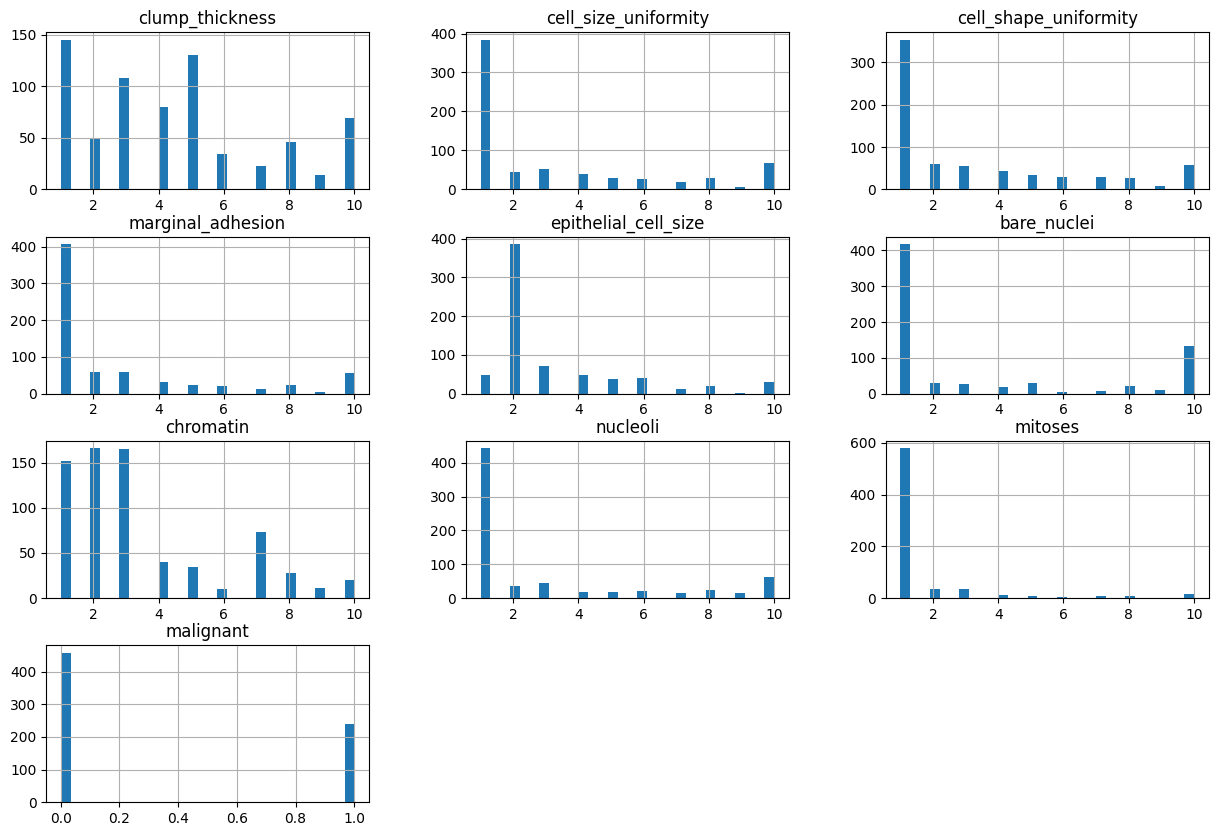

count    699.000000
mean       1.589413
std        1.715078
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       10.000000
Name: mitoses, dtype: float64


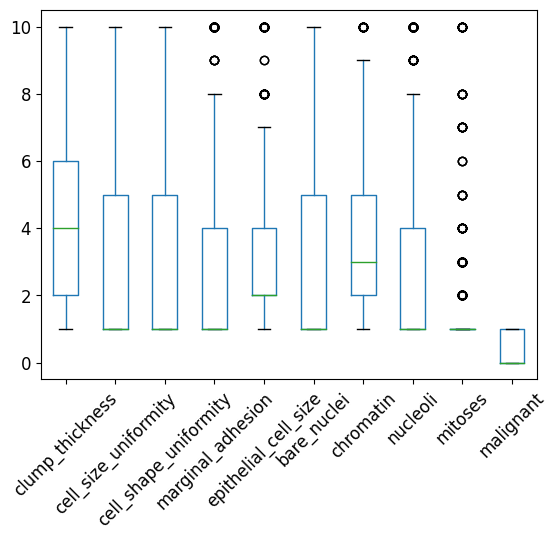

In [92]:
import matplotlib.pyplot as plt

plt.figure()
df.hist(bins=30, figsize=(15, 10))
plt.show()


# for col in col_names:
stats = df['mitoses'].describe()
print(f'{stats}')

plt.figure()
df.boxplot(grid=False, fontsize=12, rot=45)
plt.show()


In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
updated_cols = [n for n in col_names if n != 'malignant' and n != 'id_num']

df[updated_cols] = scaler.fit_transform(df[updated_cols])
Y = df['malignant']
df.head()
X_train, X_test, y_train, y_test = train_test_split(df[updated_cols], Y, random_state=0)


,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,epithelial_cell_size,bare_nuclei,chromatin,nucleoli,mitoses
1344121,1.273138,2.251526,0.266875,0.418154,2.162039,1.799664,1.872361,-0.284112,-0.343912
1075123,-0.503866,-0.699995,-0.406574,-0.633247,-0.549561,-0.686979,-0.590067,-0.611825,-0.343912
1286943,1.273138,2.251526,2.287222,2.520955,1.710106,0.418196,0.230743,1.682167,3.156977
1306282,0.562336,0.939739,1.277048,2.520955,-0.097628,1.799664,1.872361,2.337594,0.239570
1334071,-0.148465,-0.699995,-0.743299,-0.633247,-0.549561,-0.134392,-0.590067,-0.611825,-0.343912


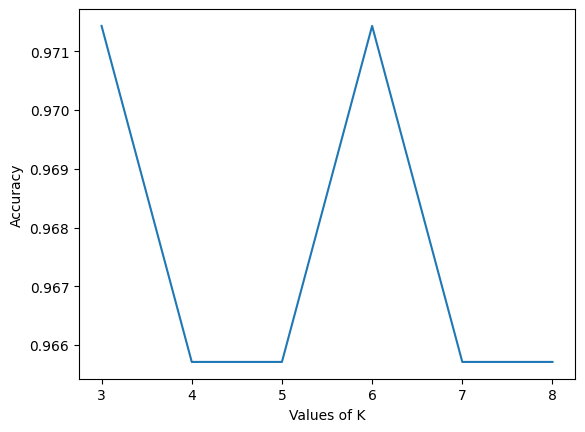

In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


k_vals = range(3, 9)
accuracies: list[float] = []


for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    

plt.plot(k_vals, accuracies)
plt.xlabel('Values of K')
plt.ylabel('Accuracy')
plt.show()

accuracy: 0.971
precision: 0.968
recall: 0.952
f1: 0.960


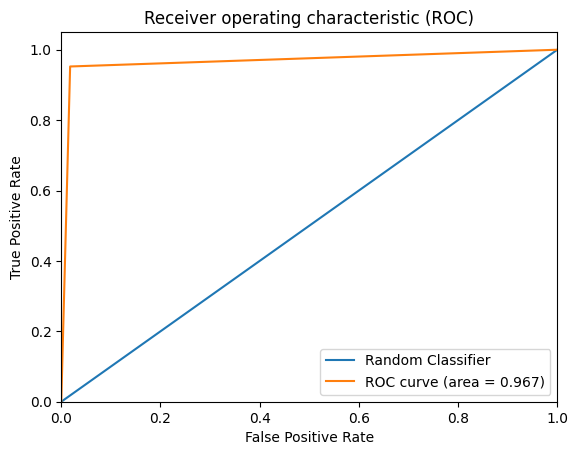

True Negatives: 110, False Positives: 2, False Negatives: 3, True Positives: 60


In [112]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc


metric_list = {'accuracy': accuracy_score, 'precision': precision_score, 'recall': recall_score, 'f1': f1_score}

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

for name, metric in metric_list.items():
    print(f'{name}: {metric(y_test, y_pred):.3f}')

accuracy = accuracy_score(y_test, y_pred)

fpr, tpr, _ = roc_curve(y_test, y_pred)

roc_auc = auc(fpr, tpr)

plt.plot([0, 1], [0, 1], label='Random Classifier')
plt.plot(fpr, tpr, label= f'ROC curve (area = {roc_auc:.3f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}')
